## 1. Problem Definition

Can we predict or classify whether the patient is susceptible for stroke or not?

In [6]:
!pip3 install seaborn

In [7]:
# EDA and plotiing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Exploratory Data Analysis

In [8]:
# Load the data
df = pd.read_csv("data/stroke/input/healthcare-dataset-stroke-data.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
df.shape

(5110, 12)

In [12]:
# Let's see how many positives(1) and negatives(0) in our target
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [13]:
# Normalized value counts
df["stroke"].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

We have an **unbalanced** target column, we have more samples for false and very less samples for negative

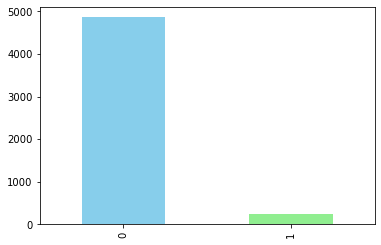

In [17]:
# Visulazing the value counts
df["stroke"].value_counts().plot(kind="bar", color=["skyblue", "lightgreen"]);

In [18]:
# Getting metrics on the columns
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### `Stroke` with respect to `gender`

In [28]:
pd.crosstab(df.gender, df.stroke)

stroke,0,1
gender,,
Female,2853,141
Male,2007,108
Other,1,0


**Female** with stroke are more than **Male**, There's an outlier with one sample in **other** gender we'll drop the sample.

In [29]:
df = df[df["gender"] != "Other"]

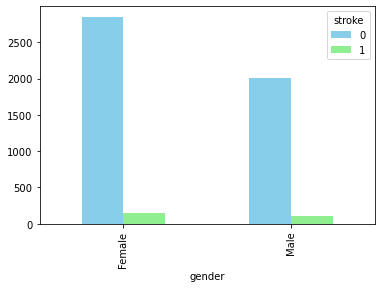

In [32]:
pd.crosstab(df.gender, df.stroke).plot(kind="bar", color=["skyblue", "lightgreen"]);

### `Stroke` with respect to `ever_married`

In [33]:
pd.crosstab(df["ever_married"], df["stroke"])

stroke,0,1
ever_married,,
No,1727,29
Yes,3133,220


**ever_married** people have stroke more than **never_married**. (Not sure what to say about this one 😜)

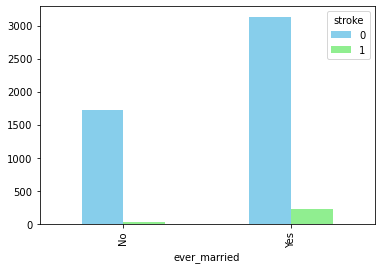

In [35]:
# Visualizing the crosstab
pd.crosstab(df["ever_married"], df["stroke"]).plot(kind="bar", color=["skyblue", "lightgreen"]);

### `residence_type` with respect to `stroke`

In [36]:
pd.crosstab(df["Residence_type"], df["stroke"])

stroke,0,1
Residence_type,,
Rural,2399,114
Urban,2461,135


**urban** people have a little edge than **rural** on stroke possiblity

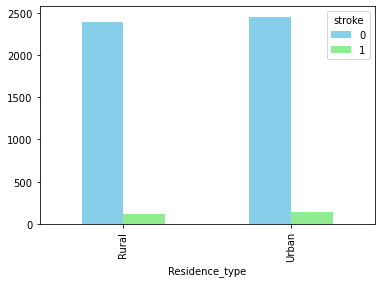

In [39]:
# Visualizing residence_type with target
pd.crosstab(df["Residence_type"], df["stroke"]).plot(kind="bar", color=["skyblue", "lightgreen"]);

### `smoking_type` with respect to `stroke`

In [41]:
pd.crosstab(df["smoking_status"], df["stroke"])

stroke,0,1
smoking_status,,
Unknown,1497,47
formerly smoked,814,70
never smoked,1802,90
smokes,747,42


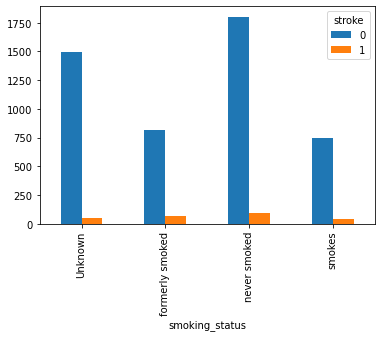

In [43]:
pd.crosstab(df["smoking_status"], df["stroke"]).plot(kind="bar");

In [44]:
df["smoking_status"].value_counts(normalize=True)

never smoked       0.370327
Unknown            0.302212
formerly smoked    0.173028
smokes             0.154433
Name: smoking_status, dtype: float64

**never smoked** are affected by stroke higher than other categories, but the sample size for never_smoked is 37%.

### `work_type` with respect to `stroke`

In [47]:
pd.crosstab(df["work_type"], df["stroke"])

stroke,0,1
work_type,,
Govt_job,624,33
Never_worked,22,0
Private,2775,149
Self-employed,754,65
children,685,2


In [48]:
df["work_type"].value_counts(normalize=True)

Private          0.572323
Self-employed    0.160305
children         0.134469
Govt_job         0.128597
Never_worked     0.004306
Name: work_type, dtype: float64

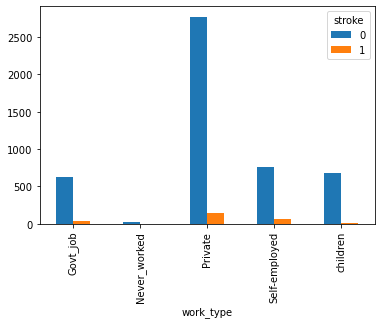

In [50]:
pd.crosstab(df["work_type"], df["stroke"]).plot(kind="bar");

People in **private** are more susceptibe to stroke compared to other categories, but *private* category sample is 57% - conveying they have the option to visit the hospital or have a health check more compared to other categories

### `hyper_tension` with respect to `stroke`

In [52]:
pd.crosstab(df["hypertension"], df["stroke"])

stroke,0,1
hypertension,,
0,4428,183
1,432,66


**hypertension** people are more susceptible to stroke

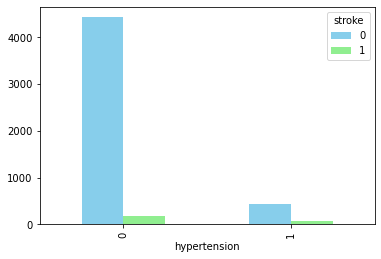

In [54]:
pd.crosstab(df["hypertension"], df["stroke"]).plot(kind="bar", color=["skyblue", "lightgreen"]);

### `age` with respect to `stroke`

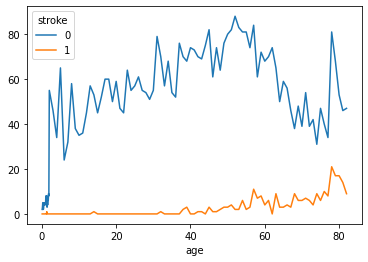

In [63]:
pd.crosstab(df["age"], df["stroke"]).plot(kind="line");

**Aged** people are more susceptible to stroke than young ones

### `bmi` with respect to `stroke`

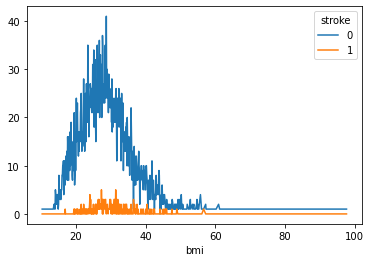

In [67]:
pd.crosstab(df["bmi"], df["stroke"]).plot(kind="line");

### `age` and `bmi` impact on `stroke`

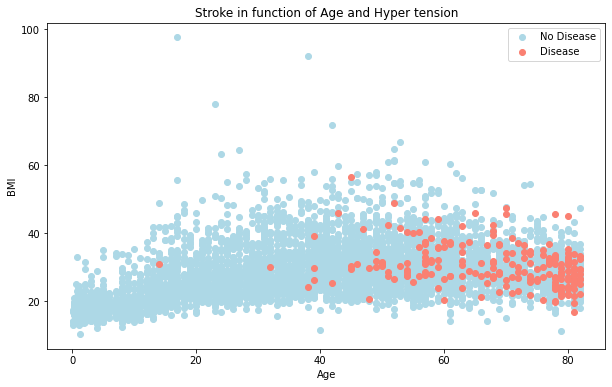

In [75]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.stroke==0], 
            df.bmi[df.stroke==0], 
            c="lightblue") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.stroke==1], 
            df.bmi[df.stroke==1], 
            c="salmon") # axis always come as (x, y)

# Add some helpful info
plt.title("Stroke in function of Age and Hyper tension")
plt.xlabel("Age")
plt.legend(["No Disease", "Disease"])
plt.ylabel("BMI");

Higer age and less bmi are contributing towards a possiblity in stroke